In [2]:
from hcipy import *
import numpy as np  
import matplotlib.pyplot as plt
from aotools import *

%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

## Grids, Pupil and apertures, etc.

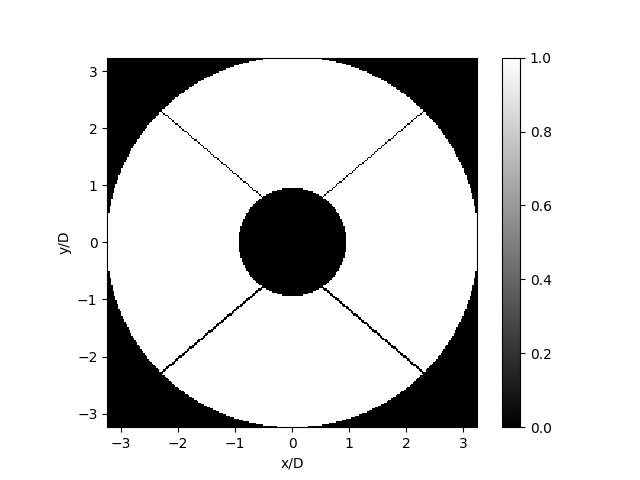

<class 'function'>
<class 'hcipy.field.cartesian_grid.CartesianGrid'>
<class 'function'>
<class 'function'>
<class 'hcipy.field.field.OldStyleField'>
[-3.23730469 -3.21191406 -3.18652344 ...  3.18652344  3.21191406
  3.23730469] [-3.23730469 -3.23730469 -3.23730469 ...  3.23730469  3.23730469
  3.23730469]
[[-3.23730469 -3.23730469]
 [-3.21191406 -3.23730469]
 [-3.18652344 -3.23730469]
 ...
 [ 3.18652344  3.23730469]
 [ 3.21191406  3.23730469]
 [ 3.23730469  3.23730469]]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


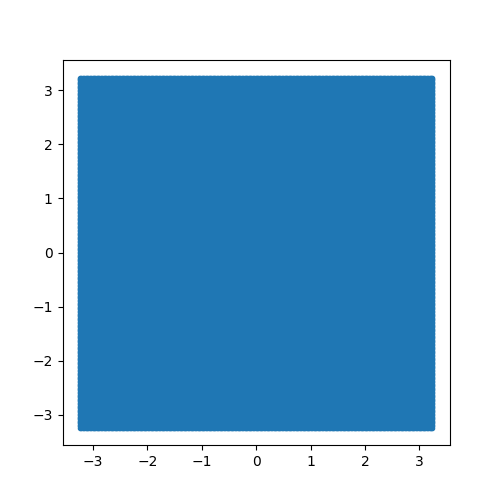

In [3]:
pupil_grid = make_pupil_grid(256,6.5) # type: ignore # generates a square array with 256 pixels and a square sidelength (or, diameter) of 6.5m
telescope_pupil_generator = make_magellan_aperture(normalized=False) # type: ignore  # by default, the magellan telescope is 6.5m diameter.
telescope_pupil = telescope_pupil_generator(pupil_grid)
im = imshow_field(telescope_pupil, cmap='gray') # type: ignore
plt.colorbar()
plt.xlabel('x/D')
plt.ylabel('y/D')
plt.show()
# im_p = plt.imshow(telescope_pupil, cmap='gray')
# plt.colorbar()
# plt.xlabel('x/D')
# plt.ylabel('y/D')
# plt.show()

print(type(make_pupil_grid))  # function
print(type(pupil_grid))  # not an array. its a differen kind of entity
print(type(make_magellan_aperture)) # function
print(type(telescope_pupil_generator)) # function
print(type(telescope_pupil)) # not an array. its a different kind of etity

# thats the reason why telescope pupil cannot be plotted using just plt.imshow and it needs a specialized imshow_field

print(pupil_grid.x, pupil_grid.y)
print(pupil_grid.points)
print(pupil_grid.coords)
print(type(pupil_grid.x))
print(type(pupil_grid.x))
print(type(pupil_grid.points))

plt.figure(figsize=(5,5))
plt.plot(pupil_grid.x, pupil_grid.y, '.')
plt.show()

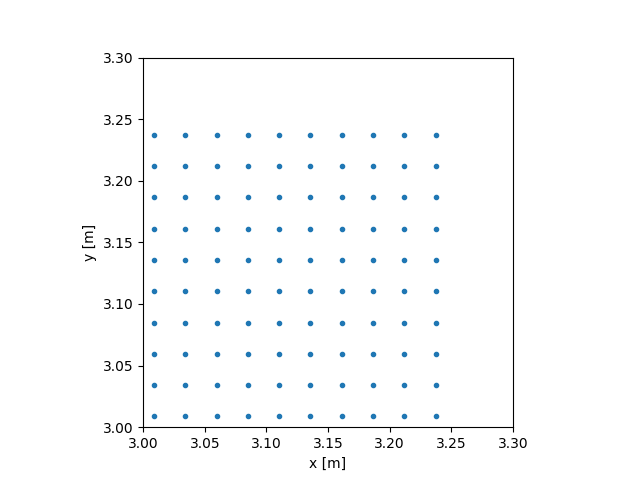

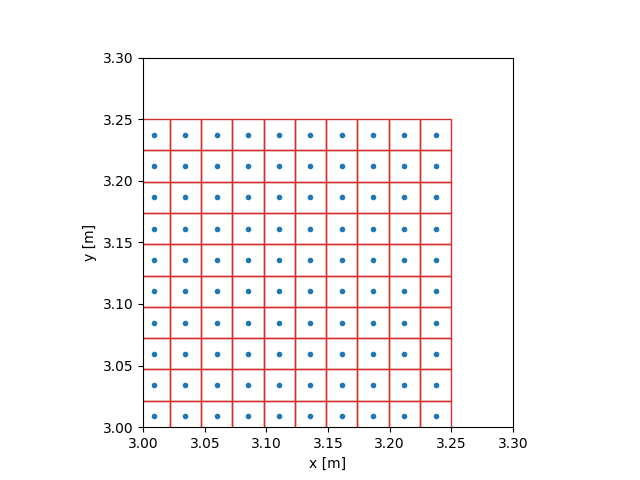

In [4]:
# lets look at it by zooming in a part of it

plt.plot(pupil_grid.x, pupil_grid.y, '.')
plt.gca().set_aspect(1)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(3, 3.3)
plt.ylim(3, 3.3)
plt.show()

# these dots do not extend all the way to 6.5/2 = 3.25
# it is also evident from the maximimum values of pupil_grid.x and pupil_grid.y
# the reason is that these dots represent the centres of each of the 256 pixels that we made using the make_pupil_grid function

# now to denote the pixels
plt.plot(pupil_grid.x, pupil_grid.y, '.')
plt.gca().set_aspect(1)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(3, 3.3)
plt.ylim(3, 3.3)

A=[]
for p in pupil_grid.points:
    A.append(pupil_grid.delta)
    rect = plt.Rectangle(p - pupil_grid.delta / 2, *pupil_grid.delta, linewidth=1, edgecolor=colors.red, facecolor='none')
    plt.gca().add_patch(rect)

plt.show()


In [5]:
print(np.array(A))
print(type(pupil_grid.delta))
print(pupil_grid.delta)


[[0.02539062 0.02539062]
 [0.02539062 0.02539062]
 [0.02539062 0.02539062]
 ...
 [0.02539062 0.02539062]
 [0.02539062 0.02539062]
 [0.02539062 0.02539062]]
<class 'numpy.ndarray'>
[0.02539062 0.02539062]


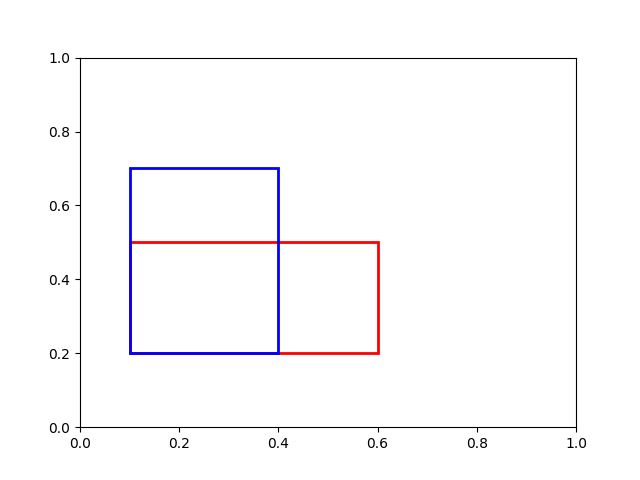

"\npatches.Rectangle((x, y), width, height, ...): This creates a rectangle.\n(x, y) specifies the bottom-left corner of the rectangle.\nwidth and height specify the dimensions.\nlinewidth=2: Sets the thickness of the rectangle's edge.\nedgecolor='r': Sets the color of the edge (red in this case).\nfacecolor='none': Removes the fill inside the rectangle.\n"

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a new figure and axis
fig, ax = plt.subplots()

dim = [0.5, 0.3]
# Create a Rectangle patch
rect1 = patches.Rectangle((0.1, 0.2), *dim, linewidth=2, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((0.1, 0.2), 0.3, 0.5, linewidth=2, edgecolor='b', facecolor='none')
# Add the rectangle to the plot
ax.add_patch(rect1)
ax.add_patch(rect2)
# Set the limits of the plot
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

# Show the plot with the rectangle
plt.show()

'''
patches.Rectangle((x, y), width, height, ...): This creates a rectangle.
(x, y) specifies the bottom-left corner of the rectangle.
width and height specify the dimensions.
linewidth=2: Sets the thickness of the rectangle's edge.
edgecolor='r': Sets the color of the edge (red in this case).
facecolor='none': Removes the fill inside the rectangle.
'''


[0. 0. 0. ... 0. 0. 0.]
<class 'hcipy.field.field.OldStyleField'>


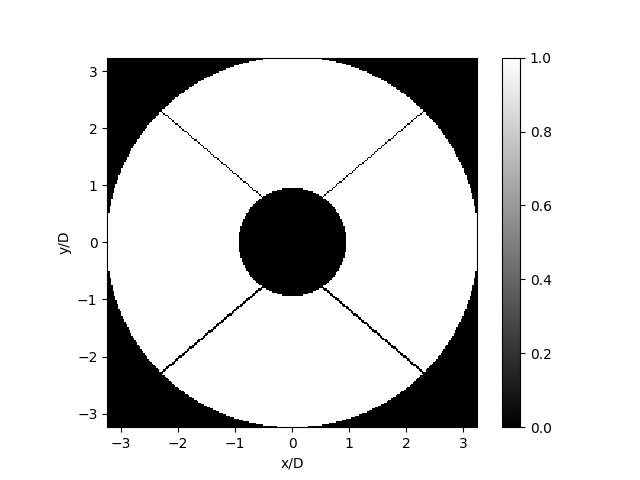

In [7]:
print(telescope_pupil)
print(type(telescope_pupil))
im = imshow_field(telescope_pupil, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.xlabel('x/D')
plt.ylabel('y/D')
plt.show()

# plt.imshow(np.array(telescope_pupil))
# plt.show() 
# does not work as the "np.array(telescope_pupil)" becomes 1D

### Lets do a different type of telescope aperture

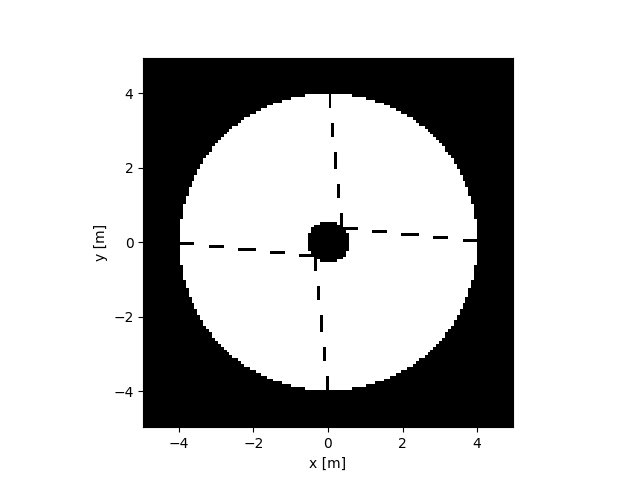

In [8]:
pupil_grid = make_pupil_grid(128, 10) # type: ignore # generates a square array with 256 pixels and a square sidelength (or, diameter) of 6.5m. default diameter is 1m.
telescope_pupil_generator = make_vlt_aperture(normalized=False) # type: ignore  # by default, the magellan telescope is 6.5m diameter.
telescope_pupil = telescope_pupil_generator(pupil_grid)
imshow_field(telescope_pupil, cmap='gray', interpolation='nearest')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()

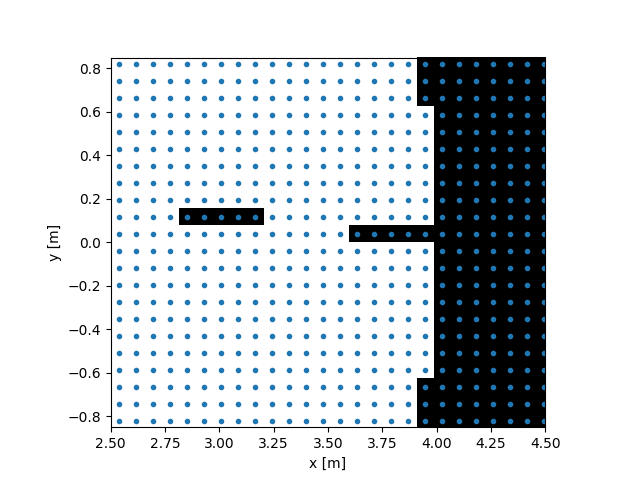

In [9]:
imshow_field(telescope_pupil, cmap='gray', interpolation='nearest')
plt.plot(pupil_grid.x, pupil_grid.y, '.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(2.5,4.5)
plt.ylim(-0.85,0.85)
plt.show()

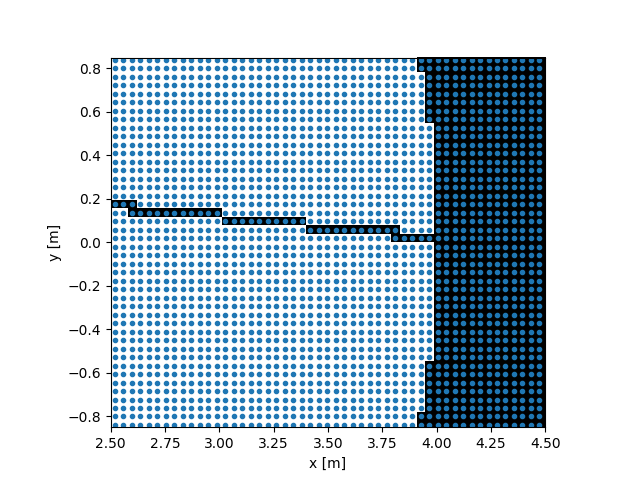

In [10]:
pupil_grid_double = make_supersampled_grid(pupil_grid, 2) # type: ignore
aperture_double = telescope_pupil_generator(pupil_grid_double)

imshow_field(aperture_double, cmap='gray', interpolation='nearest') # type: ignore
plt.plot(pupil_grid_double.x, pupil_grid_double.y, '.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(2.5, 4.5)
plt.ylim(-0.85, 0.85)
plt.show()

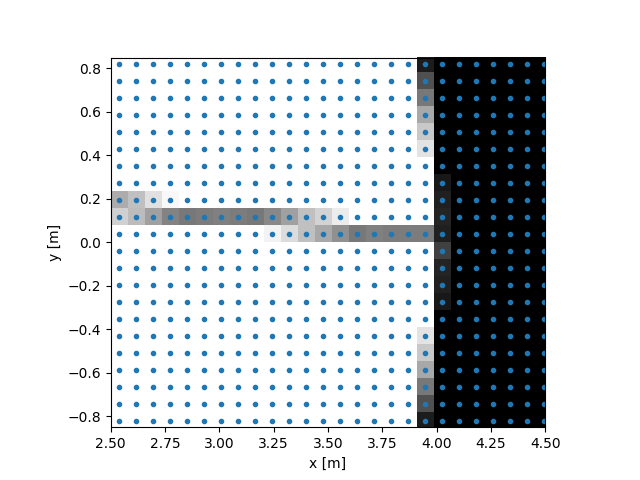

In [11]:
aperture_supersampled = evaluate_supersampled(telescope_pupil_generator, pupil_grid, 8) # type: ignore

imshow_field(aperture_supersampled, cmap='gray', interpolation='nearest') # type: ignore
plt.plot(pupil_grid.x, pupil_grid.y, '.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(2.5, 4.5)
plt.ylim(-0.85, 0.85)
plt.show()

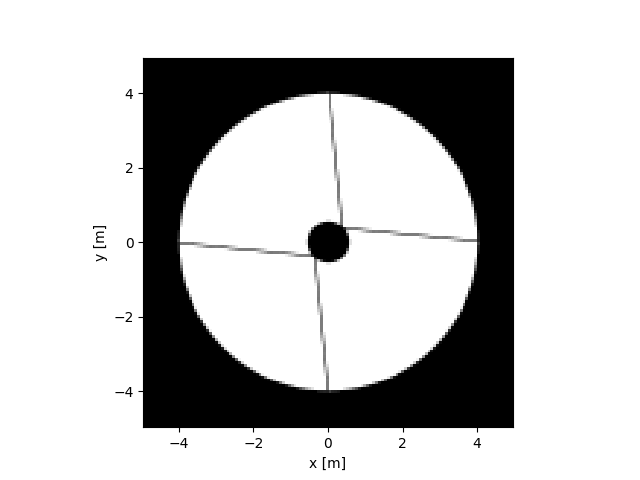

In [12]:
imshow_field(aperture_supersampled, cmap='gray', interpolation='nearest') # type: ignore
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()